In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("train.csv")
df.head()

/home/jkim/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [2]:
df = df.drop(['PassengerId','Name','Ticket'], axis=1) #drops unecessary data
df.info() #shows information

"""
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)
"""


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


'\nsurvival        Survival\n                (0 = No; 1 = Yes)\npclass          Passenger Class\n                (1 = 1st; 2 = 2nd; 3 = 3rd)\nname            Name\nsex             Sex\nage             Age\nsibsp           Number of Siblings/Spouses Aboard\nparch           Number of Parents/Children Aboard\nticket          Ticket Number\nfare            Passenger Fare\ncabin           Cabin\nembarked        Port of Embarkation\n                (C = Cherbourg; Q = Queenstown; S = Southampton)\n'

There are some null data in Age and Cabin data

In [13]:
def survived(dataframe):
    """Returns the survivor, non-survivors of the dataframe 
    in the same format"""
    yes = dataframe[dataframe.Survived ==1]
    no = dataframe[dataframe.Survived ==0]
    return yes, no

def survivor_rate(dataframe):
    """Returns the survival rate (between value 0 to 1) of the dataframe"""
    yes, no = survived(dataframe)
    return float(len(yes))/len(dataframe)

def sex(dataframe):
    """ Returns female, male of dataframe 
    in the same format"""
    female = dataframe[dataframe.Sex == 'female']
    male = dataframe[dataframe.Sex == 'male']
    return female, male

#def cabin(dataframe):
#    cabin_c = dataframe[dataframe.Cabin == 'C']
#    return cabin_c

#print len(cabin(df))

def pclass(dataframe):
    """ Returns passenger class 1, passenger class 2, passenger class 3 of dataframe 
    in the same format"""
    pc1 = dataframe[dataframe.Pclass == 1]
    pc2 = dataframe[dataframe.Pclass == 2]
    pc3 = dataframe[dataframe.Pclass == 3]
    return pc1, pc2, pc3

def embark_port(dataframe):
    """ Returns passengers who embarked in port Cherbourg, Queenstown, Southampton of dataframe 
    in the same format"""
    emc = dataframe[dataframe.Embarked == 'C'] #Cherbourg
    emq = dataframe[dataframe.Embarked == 'Q'] #Queenstown
    ems = dataframe[dataframe.Embarked == 'S'] #Southampton
    return emc, emq, ems

def cabin(dataframe):
    """ Returns passengers in Cabin A to G of dataframe 
    in the same format"""

def age(dataframe, parse_years):
    """Returns number of passengers in respective age group, each of range(parse_years),
    in the form (number of passengers in the age group, starting age of the age group)"""
    age_group = ()
    group_people_no = ()
    groups = np.ceil(dataframe.Age.max()/parse_years) #number of groups
    for i in range (0,int(groups)):
        y1 = i*parse_years
        y2 = (i+1)*parse_years
        people_no = len(dataframe[(dataframe.Age >= y1) & (dataframe.Age < y2)])
        group_people_no = group_people_no + (people_no,)
        age_group = age_group + (y1,)
    return group_people_no, age_group

AttributeError: 'Series' object has no attribute 'charAt'

In [4]:
"""Comparing the survival rate of female and male"""
female, male = sex(df)
print "survival rate for female:", survivor_rate(female)
print "survival rate for male:  ", survivor_rate(male)

survival rate for female: 0.742038216561
survival rate for male:   0.188908145581


In [5]:
"""Comparing survival rate of people from different class"""
pc1, pc2, pc3 = pclass(df)
print "survival rate for passenger class 1:", survivor_rate(pc1)
print "survival rate for passenger class 2:", survivor_rate(pc2)
print "survival rate for passenger class 3:", survivor_rate(pc3)

survival rate for passenger class 1: 0.62962962963
survival rate for passenger class 2: 0.472826086957
survival rate for passenger class 3: 0.242362525458


In [6]:
"""Comparing survival rate of people from different port of embarkation"""
emc, emq, ems = embark_port(df)
print "survival rate for passenger who embarked at Cherbourg  :", survivor_rate(emc)
print "survival rate for passenger who embarked at Queenstown :", survivor_rate(emq)
print "survival rate for passenger who embarked at Southampton:", survivor_rate(ems)

survival rate for passenger who embarked at Cherbourg  : 0.553571428571
survival rate for passenger who embarked at Queenstown : 0.38961038961
survival rate for passenger who embarked at Southampton: 0.336956521739


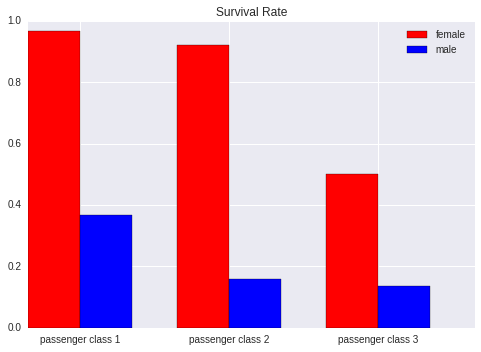

In [7]:
"""Comparing survival rate of people from different passenger class has relation to where the passenger embarked"""
pc1_f, pc2_f, pc3_f = pclass(female)
pc1_m, pc2_m, pc3_m = pclass(male)

"""Plotting bar graph"""
index = np.arange(3)
width = 0.35

fig, ax = plt.subplots()
f = plt.bar(index,
            (survivor_rate(pc1_f), survivor_rate(pc2_f),survivor_rate(pc3_f)), 
            width,
            color = 'red')
m = plt.bar(index + width,
            (survivor_rate(pc1_m), survivor_rate(pc2_m), survivor_rate(pc3_m)), 
            width,
            color = 'blue')

ax.legend((f, m), ('female', 'male'))
plt.xticks(index + width, ('passenger class 1', 'passenger class 2', 'passenger class 3'))
plt.title('Survival Rate')
plt.show()

It seems like there are very significant difference in survival rate of passenger who embarked in Cherbourg port compared to passengers who embarked at other ports. Maybe this has a relation to the richness of the passenger which can be shown by passenger class. 

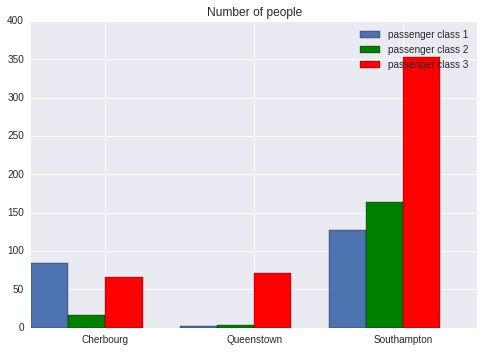

In [8]:
"""Comparing to see if different passenger class has relation with where they embarked"""
pc1_emc, pc2_emc, pc3_emc = pclass(emc)
pc1_emq, pc2_emq, pc3_emq = pclass(emq)
pc1_ems, pc2_ems, pc3_ems = pclass(ems)

"""Plotting bar graph"""
index = np.arange(3)
width = 0.25

fig, ax = plt.subplots()
#ec = plt.bar(index,
#            (survivor_rate(pc1_emc), survivor_rate(pc2_emc),survivor_rate(pc3_emc)), 
#            width)
#eq = plt.bar(index + width,
#            (survivor_rate(pc1_emq), survivor_rate(pc2_emq), survivor_rate(pc3_emq)), 
#            width,
#            color = 'green')
#em = plt.bar(index + 2*width,
#            (survivor_rate(pc1_ems), survivor_rate(pc2_ems),survivor_rate(pc3_ems)), 
#            width,
#            color = 'red')

c1 = plt.bar(index,
            (len(pc1_emc), len(pc1_emq),len(pc1_ems)), 
            width)
c2 = plt.bar(index + width,
            (len(pc2_emc), len(pc2_emq), len(pc2_ems)), 
            width,
            color = 'green')
c3 = plt.bar(index + 2*width,
            (len(pc3_emc), len(pc3_emq),len(pc3_ems)), 
            width,
            color = 'red')

ax.legend((c1, c2, c3), ('passenger class 1', 'passenger class 2', 'passenger class 3'))
plt.xticks(index + 2*width, ('Cherbourg', 'Queenstown', 'Southampton'))
plt.title('Number of people')
plt.show()

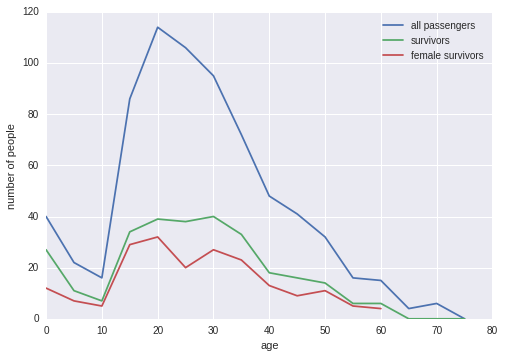

In [11]:
"""Graph comparing number of passengers with survivors"""

age_division = 5

count, age_grp = age(df,age_division)
plt.plot(age_grp, count, label='all passengers')

#female_count, age_grp = age(female,age_division)
#plt.plot(age_grp, female_count, label='female passengers')

yes, no = survived(df)
count_survived, age_grp = age(yes,age_division)
plt.plot(age_grp, count_survived, label='survivors')

female_survivors, male_survivors = sex(yes)
female_count_survived, age_grp = age(female_survivors,age_division)
plt.plot(age_grp, female_count_survived, label='female survivors')

plt.legend()
plt.ylabel('number of people')
plt.xlabel('age')
plt.show()